In [1]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression

# Подготовка данных <a name='preparing'></a>

Source: [Physics vs Chemistry vs Biology](https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology)

In [2]:
train_df = pd.read_csv('./phi_che_bio/train.csv')
test_df = pd.read_csv('./phi_che_bio/test.csv')

In [3]:
train_df.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


In [4]:
train_x = train_df['Comment'].values
test_x = test_df['Comment'].values

train_y = train_df['Topic'].values
test_y = test_df['Topic'].values

In [5]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((8695,), (8695,), (1586,), (1586,))

In [6]:
max_df = 0.95
min_df = 2
n_features = 1000
max_iter = 150

n_samples = 2000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [7]:
def fit_predict_clf(clf: Pipeline):
    clf.fit(train_x, train_y)
    return clf.predict(test_x)

# TF-IDF

In [8]:
tfidf_clf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=n_features, stop_words="english")),
    ('clf', LogisticRegression(max_iter=max_iter))
])

In [9]:
tfidf_clf.fit(train_x, train_y)
tfidf_pred = tfidf_clf.predict(test_x)

In [10]:
print(classification_report(test_y, tfidf_pred))

              precision    recall  f1-score   support

     Biology       0.77      0.77      0.77       614
   Chemistry       0.70      0.74      0.72       506
     Physics       0.79      0.75      0.77       466

    accuracy                           0.75      1586
   macro avg       0.75      0.75      0.75      1586
weighted avg       0.75      0.75      0.75      1586


		accuracy	precision	recall		f1-score	time
0		0.753		0.755		0.752		0.753		0.821 sec
1		0.753		0.755		0.752		0.753		0.889 sec
2		0.753		0.755		0.752		0.753		0.434 sec
3		0.753		0.755		0.752		0.753		0.422 sec
4		0.753		0.755		0.752		0.753		0.415 sec
5		0.753		0.755		0.752		0.753		0.412 sec
6		0.753		0.755		0.752		0.753		0.417 sec
7		0.753		0.755		0.752		0.753		0.413 sec
8		0.753		0.755		0.752		0.753		0.475 sec


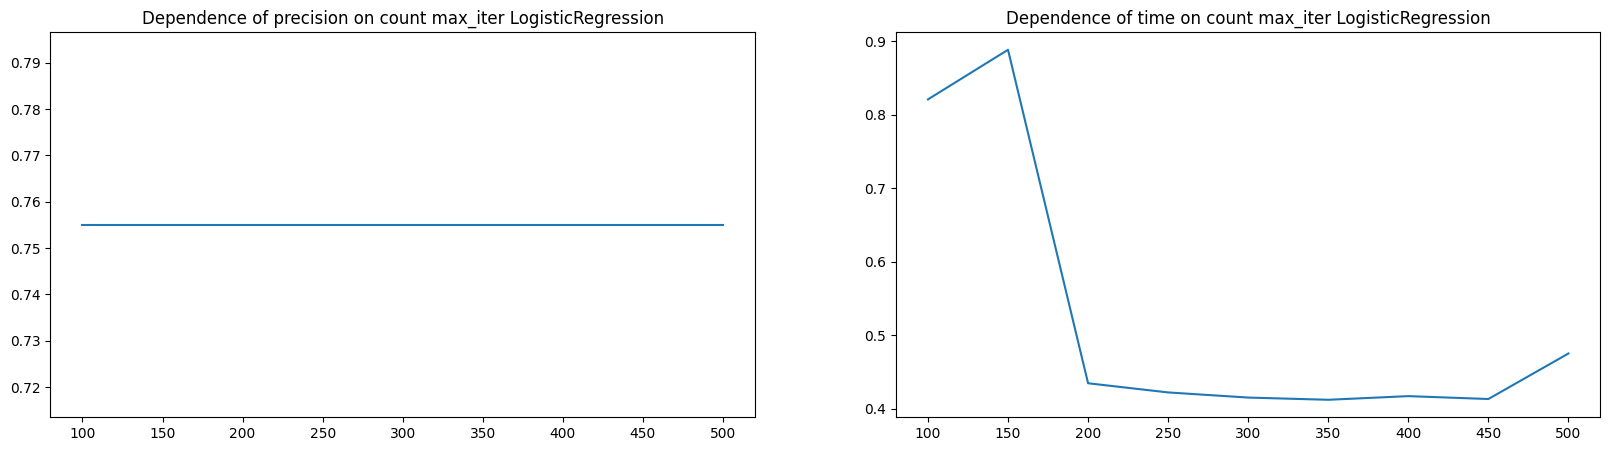

In [11]:
print(f'\t\taccuracy\tprecision\trecall\t\tf1-score\ttime')
iters = range(100,501,50)
precisions = []
times = []
for i, iter in enumerate(iters):
    tfidf_clf = Pipeline([
        ('tfidf', TfidfVectorizer(max_df=max_df, min_df=min_df, max_features=1000, stop_words="english")),
        ('clf', LogisticRegression(max_iter=iter))
    ])
    st = time()
    pred = fit_predict_clf(tfidf_clf)
    tt = time() - st
    ac = accuracy_score(test_y, pred)
    pre = precision_score(test_y, pred, average='macro')
    rec = recall_score(test_y, pred, average='macro')
    f1 = f1_score(test_y, pred, average='macro')
    
    precisions.append(pre)
    times.append(tt)
    
    round_rate = 3
    print(f'{i}\t\t{round(ac, round_rate)}\t\t{round(pre, round_rate)}\t\t{round(rec, round_rate)}\t\t{round(f1, round_rate)}\t\t{round(tt, round_rate)} sec')


plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(iters, precisions)
plt.title('Dependence of precision on count max_iter LogisticRegression')

plt.subplot(122)
plt.plot(iters, times)
plt.title('Dependence of time on count max_iter LogisticRegression')

plt.show()

		accuracy	precision	recall		f1-score	time
0		0.59		0.604		0.582		0.587		0.394 sec
1		0.695		0.697		0.695		0.695		0.448 sec
2		0.728		0.729		0.727		0.728		0.633 sec
3		0.753		0.755		0.752		0.753		1.035 sec
4		0.764		0.766		0.762		0.763		1.083 sec
5		0.777		0.777		0.775		0.776		0.9 sec
6		0.792		0.794		0.79		0.791		0.516 sec
7		0.795		0.796		0.793		0.794		0.55 sec
8		0.794		0.796		0.793		0.794		0.601 sec
9		0.801		0.803		0.799		0.801		0.638 sec


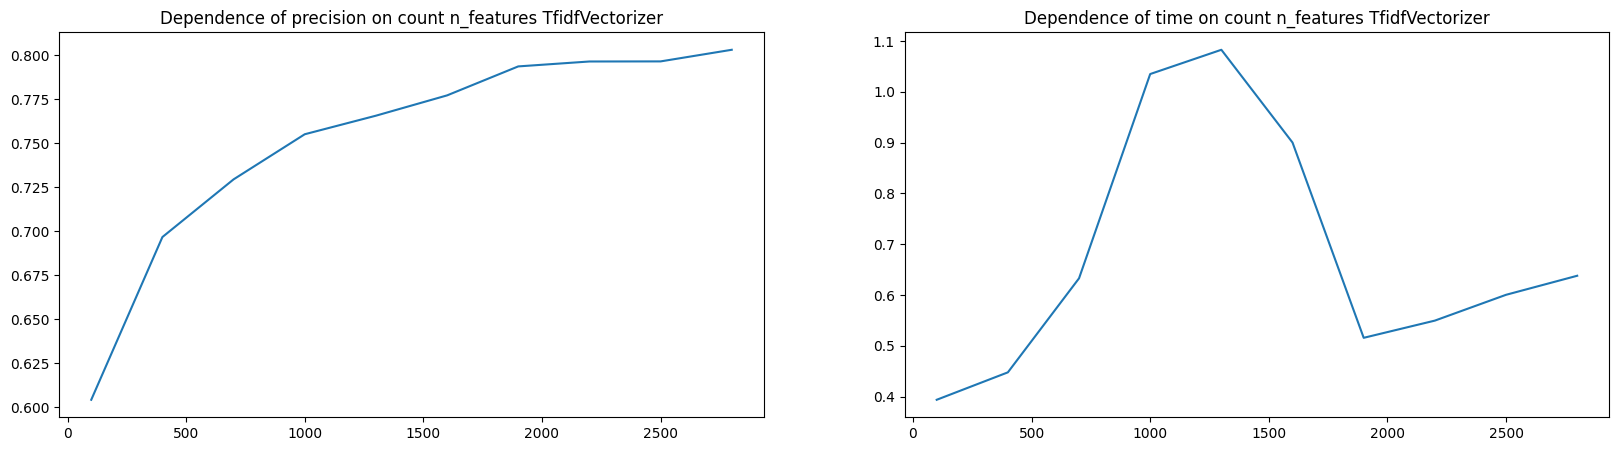

In [12]:
print(f'\t\taccuracy\tprecision\trecall\t\tf1-score\ttime')
params_range = range(100,3001,300)
precisions = []
times = []

for i, n_feat in enumerate(params_range):
    tfidf_clf = Pipeline([
        ('tfidf', TfidfVectorizer(max_df=max_df, min_df=min_df, max_features=n_feat, stop_words="english")),
        ('clf', LogisticRegression(max_iter=max_iter))
    ])
    st = time()
    pred = fit_predict_clf(tfidf_clf)
    tt = time() - st
    ac = accuracy_score(test_y, pred)
    pre = precision_score(test_y, pred, average='macro')
    rec = recall_score(test_y, pred, average='macro')
    f1 = f1_score(test_y, pred, average='macro')
    
    precisions.append(pre)
    times.append(tt)
    
    round_rate = 3
    print(f'{i}\t\t{round(ac, round_rate)}\t\t{round(pre, round_rate)}\t\t{round(rec, round_rate)}\t\t{round(f1, round_rate)}\t\t{round(tt, round_rate)} sec')


plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(params_range, precisions)
plt.title('Dependence of precision on count n_features TfidfVectorizer')

plt.subplot(122)
plt.plot(params_range, times)
plt.title('Dependence of time on count n_features TfidfVectorizer')

plt.show()

		accuracy	precision	recall		f1-score	time
0		0.726		0.765		0.711		0.718		0.588 sec
1		0.793		0.794		0.791		0.792		0.84 sec


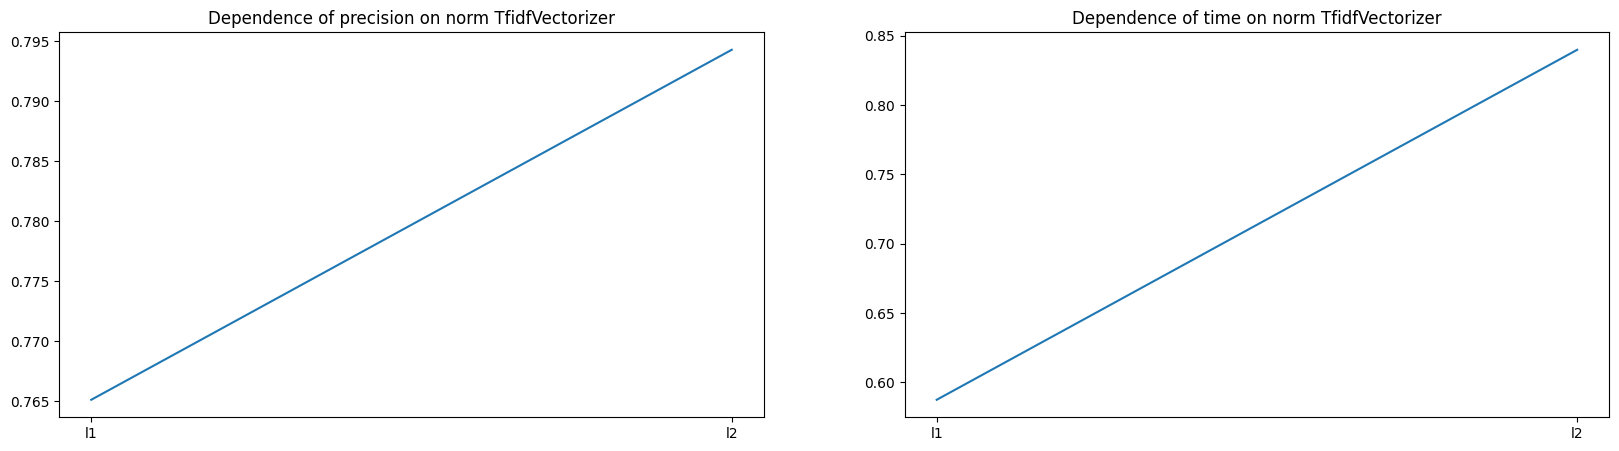

In [14]:
print(f'\t\taccuracy\tprecision\trecall\t\tf1-score\ttime')
for i, norm in enumerate(('l1', 'l2')):
    tfidf_clf = Pipeline([
        ('tfidf', TfidfVectorizer(max_df=max_df, min_df=min_df, max_features=1800, norm=norm, stop_words="english")),
        ('clf', LogisticRegression(max_iter=max_iter))
    ])
    st = time()
    pred = fit_predict_clf(tfidf_clf)
    tt = time() - st
    ac = accuracy_score(test_y, pred)
    pre = accuracy_score(test_y, pred)
    rec = accuracy_score(test_y, pred)
    f1 = accuracy_score(test_y, pred)
    
    round_rate = 3
    print(f'{i}\t\t{round(ac, round_rate)}\t\t{round(pre, round_rate)}\t\t{round(rec, round_rate)}\t\t{round(f1, round_rate)}\t\t{round(tt, round_rate)} sec')

# LDA

In [ ]:
lda_clf = Pipeline([
    ('vectorize', CountVectorizer(max_df=max_df, min_df=min_df, max_features=n_features, stop_words="english")),
    ('lda', LatentDirichletAllocation(
        n_components=1000, max_iter=5, learning_method='online', learning_offset=50., random_state=0
    )),
    ('clf', LogisticRegression(max_iter=max_iter))
])

In [ ]:
lda_clf.fit(train_x, train_y)
lda_pred = lda_clf.predict(test_x)

In [ ]:
print(classification_report(test_y, lda_pred))

		accuracy	precision	recall		f1-score	time
0		0.515		0.536		0.497		0.491		6.638 sec
1		0.574		0.595		0.564		0.569		6.214 sec
2		0.546		0.556		0.531		0.532		6.605 sec
3		0.586		0.595		0.578		0.582		6.862 sec
4		0.598		0.606		0.588		0.592		5.847 sec
5		0.617		0.621		0.609		0.612		6.514 sec
6		0.61		0.629		0.601		0.607		8.12 sec
7		0.615		0.621		0.608		0.61		7.847 sec
8		0.641		0.652		0.631		0.635		8.243 sec
9		0.617		0.622		0.609		0.613		9.043 sec


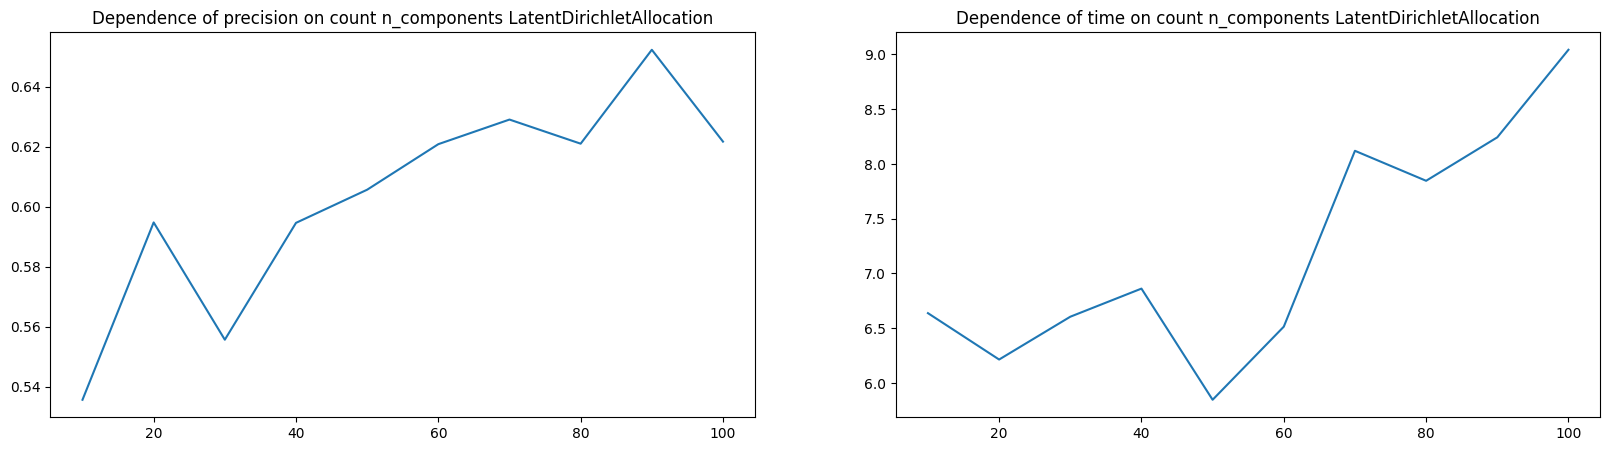

In [15]:
print(f'\t\taccuracy\tprecision\trecall\t\tf1-score\ttime')
for i, n_comp in enumerate(range(10,101,10)):
    lda_clf = Pipeline([
        ('vectorize', CountVectorizer(max_df=max_df, min_df=min_df, max_features=n_features, stop_words="english")),
        ('lda', LatentDirichletAllocation(
            n_components=n_comp, max_iter=5, learning_method='online', learning_offset=50., random_state=0
        )),
        ('clf', LogisticRegression(max_iter=max_iter))
    ])
    st = time()
    pred = fit_predict_clf(lda_clf)
    tt = time() - st
    ac = accuracy_score(test_y, pred)
    pre = accuracy_score(test_y, pred)
    rec = accuracy_score(test_y, pred)
    f1 = accuracy_score(test_y, pred)
    
    round_rate = 3
    print(f'{i}\t\t{round(ac, round_rate)}\t\t{round(pre, round_rate)}\t\t{round(rec, round_rate)}\t\t{round(f1, round_rate)}\t\t{round(tt, round_rate)} sec')

		accuracy	precision	recall		f1-score	time
0		0.61		0.618		0.602		0.605		4.2 sec
1		0.629		0.64		0.619		0.622		4.283 sec
2		0.636		0.646		0.626		0.629		6.156 sec
3		0.637		0.648		0.627		0.631		6.604 sec
4		0.641		0.652		0.631		0.635		8.736 sec
5		0.641		0.652		0.632		0.635		9.738 sec
6		0.639		0.65		0.63		0.634		9.739 sec
7		0.638		0.65		0.629		0.633		11.118 sec
8		0.637		0.649		0.628		0.632		11.712 sec
9		0.637		0.649		0.629		0.633		12.362 sec


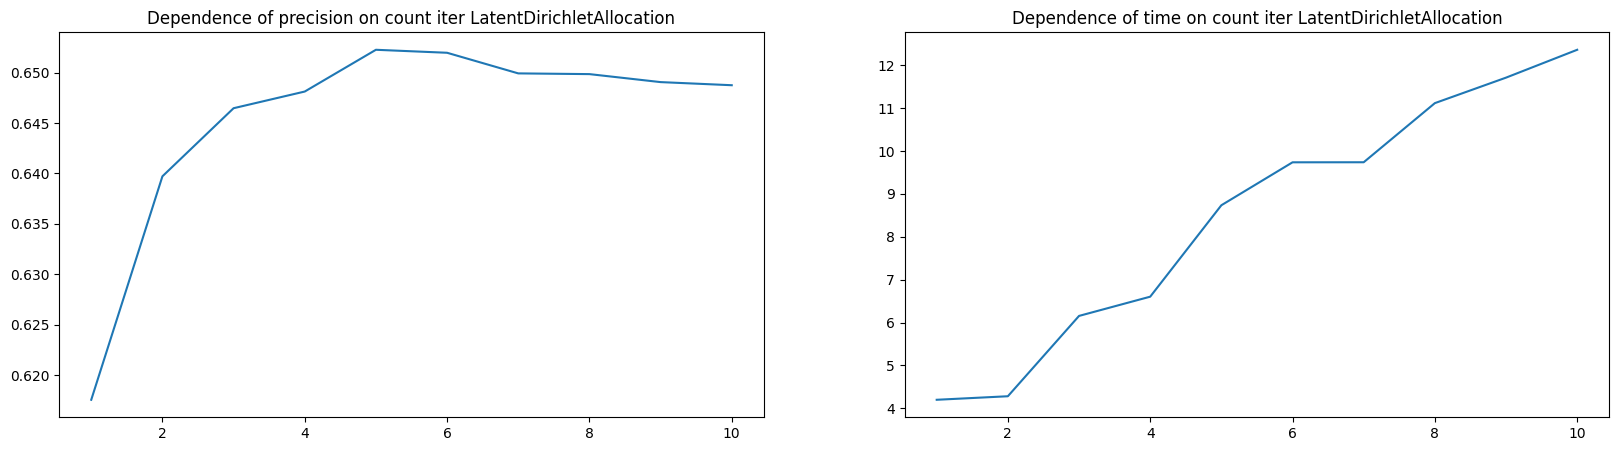

In [16]:
print(f'\t\taccuracy\tprecision\trecall\t\tf1-score\ttime')
for i, iter in enumerate(range(1,11,1)):
    lda_clf = Pipeline([
        ('vectorize', CountVectorizer(max_df=max_df, min_df=min_df, max_features=n_features, stop_words="english")),
        ('lda', LatentDirichletAllocation(
            n_components=90, max_iter=iter, learning_method='online', learning_offset=50., random_state=0
        )),
        ('clf', LogisticRegression(max_iter=max_iter))
    ])
    st = time()
    pred = fit_predict_clf(lda_clf)
    tt = time() - st
    ac = accuracy_score(test_y, pred)
    pre = accuracy_score(test_y, pred)
    rec = accuracy_score(test_y, pred)
    f1 = accuracy_score(test_y, pred)
    
    round_rate = 3
    print(f'{i}\t\t{round(ac, round_rate)}\t\t{round(pre, round_rate)}\t\t{round(rec, round_rate)}\t\t{round(f1, round_rate)}\t\t{round(tt, round_rate)} sec')

		accuracy	precision	recall		f1-score	time
0		0.523		0.545		0.507		0.511		5.617 sec
1		0.536		0.54		0.517		0.511		5.896 sec
2		0.552		0.557		0.542		0.544		6.578 sec
3		0.591		0.594		0.584		0.586		7.155 sec
4		0.622		0.633		0.616		0.621		8.311 sec
5		0.624		0.635		0.616		0.62		9.243 sec
6		0.612		0.618		0.606		0.609		8.999 sec
7		0.629		0.641		0.617		0.62		10.263 sec
8		0.632		0.634		0.631		0.632		12.948 sec
9		0.627		0.634		0.619		0.623		12.867 sec


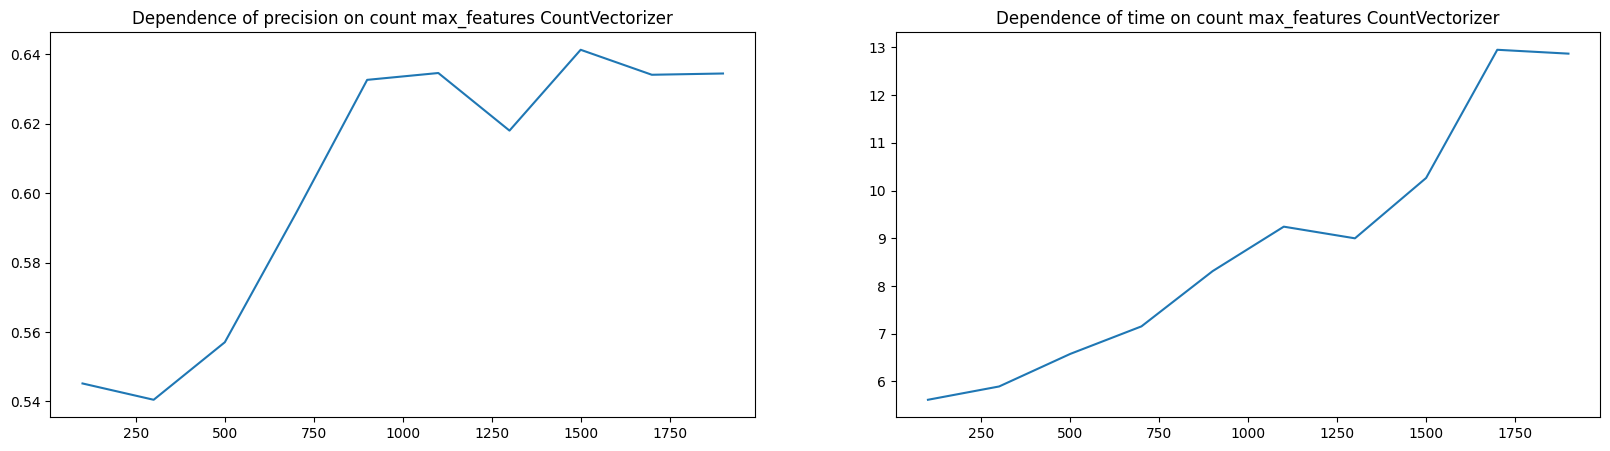

In [17]:
print(f'\t\taccuracy\tprecision\trecall\t\tf1-score\ttime')
for i, n_fit in enumerate(range(100,2001,200)):
    lda_clf = Pipeline([
        ('vectorize', CountVectorizer(max_df=max_df, min_df=min_df, max_features=n_fit, stop_words="english")),
        ('lda', LatentDirichletAllocation(
            n_components=90, max_iter=6, learning_method='online', learning_offset=50., random_state=0
        )),
        ('clf', LogisticRegression(max_iter=max_iter))
    ])
    st = time()
    pred = fit_predict_clf(lda_clf)
    tt = time() - st
    ac = accuracy_score(test_y, pred)
    pre = accuracy_score(test_y, pred)
    rec = accuracy_score(test_y, pred)
    f1 = accuracy_score(test_y, pred)
    
    round_rate = 3
    print(f'{i}\t\t{round(ac, round_rate)}\t\t{round(pre, round_rate)}\t\t{round(rec, round_rate)}\t\t{round(f1, round_rate)}\t\t{round(tt, round_rate)} sec')

		accuracy	precision	recall		f1-score	time
0		0.641		0.652		0.632		0.635		9.544 sec
1		0.619		0.629		0.607		0.611		9.925 sec


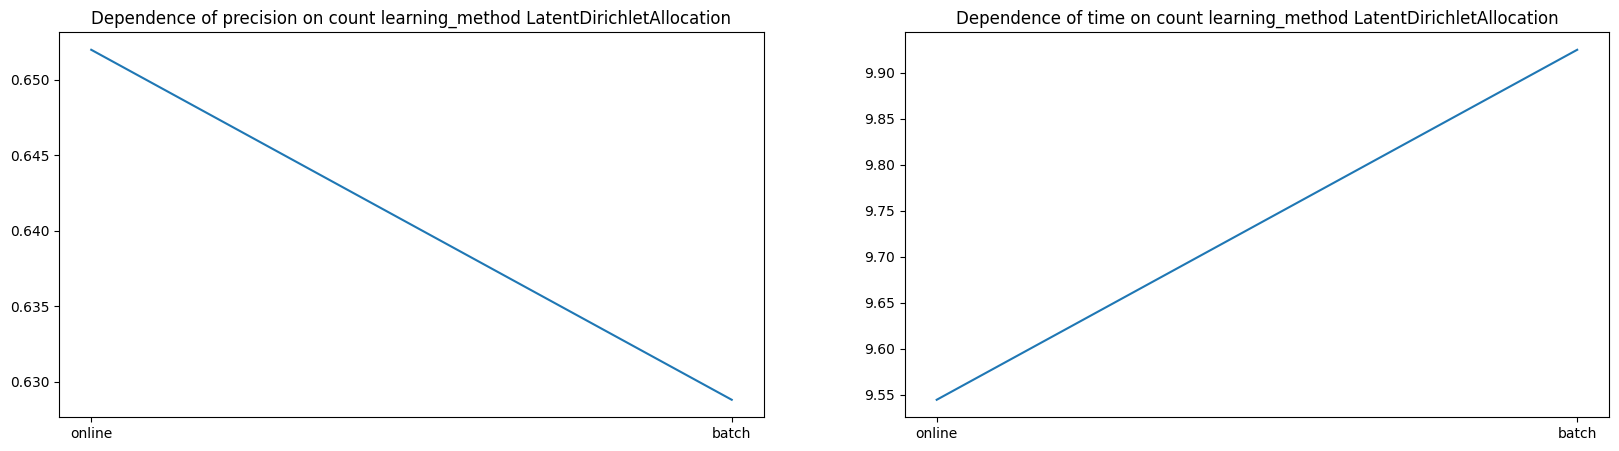

In [18]:
print(f'\t\taccuracy\tprecision\trecall\t\tf1-score\ttime')
for i, method in enumerate(('online', 'batch')):
    lda_clf = Pipeline([
        ('vectorize', CountVectorizer(max_df=max_df, min_df=min_df, max_features=1000, stop_words="english")),
        ('lda', LatentDirichletAllocation(
            n_components=90, max_iter=6, learning_method=method, learning_offset=50., random_state=0
        )),
        ('clf', LogisticRegression(max_iter=max_iter))
    ])
    st = time()
    pred = fit_predict_clf(lda_clf)
    tt = time() - st
    ac = accuracy_score(test_y, pred)
    pre = accuracy_score(test_y, pred)
    rec = accuracy_score(test_y, pred)
    f1 = accuracy_score(test_y, pred)
    
    round_rate = 3
    print(f'{i}\t\t{round(ac, round_rate)}\t\t{round(pre, round_rate)}\t\t{round(rec, round_rate)}\t\t{round(f1, round_rate)}\t\t{round(tt, round_rate)} sec')

In [ ]:
round_rate = 3
print(f'\t\t\taccuracy\tprecision\trecall\t\tf1-score\ttime')

tf_clf = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=max_df, min_df=min_df, max_features=1800, stop_words="english")),
    ('clf', LogisticRegression(max_iter=max_iter))
])
st = time()
pred = fit_predict_clf(tf_clf)
tt = time() - st
ac = accuracy_score(test_y, pred)
pre = accuracy_score(test_y, pred)
rec = accuracy_score(test_y, pred)
f1 = accuracy_score(test_y, pred)

print(f'TF-IDF\t\t{round(ac, round_rate)}\t\t{round(pre, round_rate)}\t\t{round(rec, round_rate)}\t\t{round(f1, round_rate)}\t\t{round(tt, round_rate)} sec')

lda_clf = Pipeline([
    ('vectorize', CountVectorizer(max_df=max_df, min_df=min_df, max_features=1000, stop_words="english")),
    ('lda', LatentDirichletAllocation(
        n_components=90, max_iter=6, learning_method='online', learning_offset=50., random_state=0
    )),
    ('clf', LogisticRegression(max_iter=max_iter))
])
st = time()
pred = fit_predict_clf(lda_clf)
tt = time() - st
ac = accuracy_score(test_y, pred)
pre = accuracy_score(test_y, pred)
rec = accuracy_score(test_y, pred)
f1 = accuracy_score(test_y, pred)

print(f'LDA\t\t\t{round(ac, round_rate)}\t\t{round(pre, round_rate)}\t\t{round(rec, round_rate)}\t\t{round(f1, round_rate)}\t\t{round(tt, round_rate)} sec')

TF-IDF		0.641		0.641		0.641		0.641		9.31 sec
LDA			0.402		0.402		0.402		0.402		19.144 sec
